In [18]:
import numpy as np
import matplotlib.pyplot as plt

from gplearn.genetic import SymbolicRegressor
from gplearn.functions import make_function
from gplearn.fitness import make_fitness


In [19]:
population_size = 1000
generations = 50
p_crossover = 0.7
p_mutation = 0.0

X_train = np.linspace(-1.0,1.0,21).reshape(-1,1)
target = [0.0000,-0.1629,-0.2624,-0.3129,-0.3264,-0.3135,
          -0.2784,-0.2289,-0.1664,-0.0909,0.0,0.1111,0.2496,
          0.4251,0.6496,0.9375,1.3056, 1.7731,2.3616,3.0951,4.0000]
y_train = np.array(target, dtype = np.float64)

In [ ]:
#exp function is not built-in in gplearn but they offer a way to make any function with make_function
exp = 'exp'
exp_arity = 1
exp_function = make_function(np.exp, exp, exp_arity)
function_set = ['add', 'sub', 'mul', 'div',
                'log', 'sin','cos', exp_function] 

In [27]:
def absolute_errors(y,y_pred,w):
    diffs = np.abs(np.subtract(y,y_pred))
    return np.sum(np.multiply(diffs,w))

metric = make_fitness(absolute_errors,greater_is_better = False)    

In [28]:
est_gp = SymbolicRegressor(population_size = population_size,
                           generations = generations, p_crossover = p_crossover, 
                           p_subtree_mutation = p_mutation, p_hoist_mutation = p_mutation, 
                           p_point_mutation = p_mutation, verbose = 1, metric = metric,
                           random_state = 0, function_set = function_set)
est_gp.fit(X_train, y_train)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    15.98      5.22308e+19        8          7.80265              N/A      9.92s
   1    12.05      8.24586e+11       15          4.14787              N/A     10.77s
   2    13.84      5.54901e+16       12          2.60706              N/A     12.61s
   3    15.04      2.40424e+12       30          1.46289              N/A     11.01s
   4    14.57              inf       30          1.46289              N/A     11.67s
   5    14.54       7.3084e+18       30          1.46289              N/A     10.40s
   6    22.86          14.3106       30          1.33782              N/A     11.75s
   7    30.00          10.0478       30          1.33782              N/A     12.44s
   8    29.45          10.8327       28          1.31626              N/A  

SymbolicRegressor(const_range=(-1.0, 1.0), feature_names=None,
                  function_set=['add', 'sub', 'mul', 'div', 'log', 'sin', 'cos',
                  generations=50, init_depth=(2, 6),
                  init_method='half and half', low_memory=False,
                  max_samples=1.0,
                  metric=<gplearn.fitness._Fitness object at 0x0000021E40018BE0>,
                  n_jobs=1, p_crossover=0.7, p_hoist_mutation=0.0,
                  p_point_mutation=0.0, p_point_replace=0.05,
                  p_subtree_mutation=0.0, parsimony_coefficient=0.001,
                  population_size=1000, random_state=0, stopping_criteria=0.0,
                  tournament_size=20, verbose=1, warm_start=False)

In [29]:
best_fitness = est_gp.run_details_['best_fitness'] 
best_length = est_gp.run_details_['best_length']

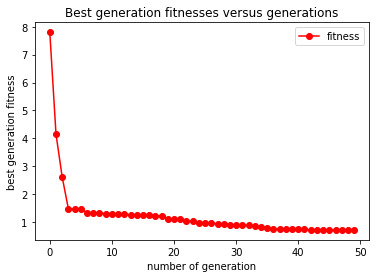

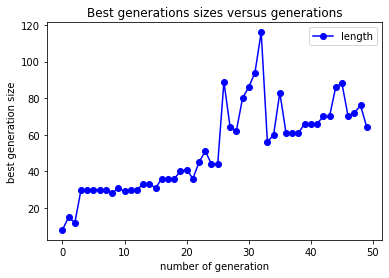

In [30]:
plt.plot(best_fitness,'-o',color = 'r', label = "fitness")
plt.title("Best generation fitnesses versus generations")
plt.xlabel("number of generation")
plt.ylabel("best generation fitness")
plt.legend()
plt.show()

plt.plot(best_length,'-o',color = 'b', label = "length")
plt.title("Best generations sizes versus generations")
plt.xlabel("number of generation")
plt.ylabel("best generation size")
plt.legend()
plt.show()